In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('train_indessa.csv')

In [2]:
# df.head()
df.application_type.unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [3]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [5]:
# check count of null value
df.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [6]:
df.shape

(532428, 45)

In [7]:
# df.application_type.unique()


In [8]:
# check constant value present or not
df.columns[df.nunique() <= 1]

Index([], dtype='object')

In [9]:
df[df["annual_inc"].isnull()]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
170053,70735,6500,6500,0.0,36 months,BAT2331079,8.38,A,A5,NaN,...,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,NaN,1
198875,79906,7000,7000,3450.0,36 months,BAT4347689,7.75,A,A3,NaN,...,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,NaN,1
402854,79878,6700,6700,6700.0,36 months,NaN,7.75,A,A3,NaN,...,NaN,NaN,INDIVIDUAL,NaN,157th week,NaN,NaN,NaN,NaN,1


In [10]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [11]:
df = pd.read_csv('train_indessa.csv')
df.columns[df.isnull().any()].tolist()

['batch_enrolled',
 'emp_title',
 'emp_length',
 'annual_inc',
 'desc',
 'title',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [12]:
df = pd.read_csv('train_indessa.csv', usecols=['batch_enrolled',
 'emp_title',
 'emp_length',
 'annual_inc',
 'desc',
 'title',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim'])

In [13]:
df.head()

,batch_enrolled,emp_title,emp_length,annual_inc,desc,title,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,,clerk,9 years,28700.0,NaN,Debt consolidation,0.0,1.0,50.0,75.0,...,1.0,73.1,28.0,0.0,74.0,NaN,0.0,0.0,28699.0,30800.0
1,BAT1586599,Human Resources Specialist,< 1 year,65000.0,NaN,Home improvement,0.0,1.0,NaN,NaN,...,0.0,23.2,13.0,0.0,NaN,NaN,0.0,0.0,9974.0,32900.0
2,BAT1586599,Driver,2 years,45000.0,NaN,Debt consolidation,0.0,0.0,NaN,NaN,...,0.0,31.2,19.0,0.0,NaN,NaN,0.0,65.0,38295.0,34900.0
3,BAT4808022,Us office of Personnel Management,10+ years,105000.0,> My goal is to obtain a loan to pay off my hi...,Debt consolidation,0.0,2.0,46.0,NaN,...,0.0,55.5,21.0,0.0,NaN,NaN,0.0,0.0,55564.0,24700.0
4,BAT2833642,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,52000.0,NaN,refi,0.0,0.0,NaN,NaN,...,0.0,76.2,27.0,0.0,NaN,NaN,0.0,0.0,47159.0,47033.0


In [14]:
df.isnull().mean()

batch_enrolled                 0.159926
emp_title                      0.057910
emp_length                     0.050506
annual_inc                     0.000006
desc                           0.858011
title                          0.000169
delinq_2yrs                    0.000030
inq_last_6mths                 0.000030
mths_since_last_delinq         0.511908
mths_since_last_record         0.845758
open_acc                       0.000030
pub_rec                        0.000030
revol_util                     0.000539
total_acc                      0.000030
collections_12_mths_ex_med     0.000178
mths_since_last_major_derog    0.750239
verification_status_joint      0.999427
acc_now_delinq                 0.000030
tot_coll_amt                   0.078891
tot_cur_bal                    0.078891
total_rev_hi_lim               0.078891
dtype: float64

In [15]:
def fill_nan_val(df, variable, median):
    df[variable+"_median"]=df[variable].fillna(median)

In [16]:
median=df.mths_since_last_delinq.median()
median

31.0

In [17]:
fill_nan_val(df,'mths_since_last_delinq',median)
df.head()

,batch_enrolled,emp_title,emp_length,annual_inc,desc,title,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_delinq_median
0,,clerk,9 years,28700.0,NaN,Debt consolidation,0.0,1.0,50.0,75.0,...,73.1,28.0,0.0,74.0,NaN,0.0,0.0,28699.0,30800.0,50.0
1,BAT1586599,Human Resources Specialist,< 1 year,65000.0,NaN,Home improvement,0.0,1.0,NaN,NaN,...,23.2,13.0,0.0,NaN,NaN,0.0,0.0,9974.0,32900.0,31.0
2,BAT1586599,Driver,2 years,45000.0,NaN,Debt consolidation,0.0,0.0,NaN,NaN,...,31.2,19.0,0.0,NaN,NaN,0.0,65.0,38295.0,34900.0,31.0
3,BAT4808022,Us office of Personnel Management,10+ years,105000.0,> My goal is to obtain a loan to pay off my hi...,Debt consolidation,0.0,2.0,46.0,NaN,...,55.5,21.0,0.0,NaN,NaN,0.0,0.0,55564.0,24700.0,46.0
4,BAT2833642,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,52000.0,NaN,refi,0.0,0.0,NaN,NaN,...,76.2,27.0,0.0,NaN,NaN,0.0,0.0,47159.0,47033.0,31.0


In [18]:
print(df['mths_since_last_delinq'].std())
print(df['mths_since_last_delinq_median'].std())

21.88479738151483
15.36559939118786


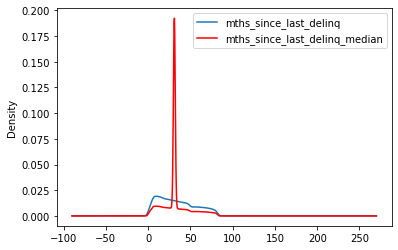

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df['mths_since_last_delinq'].plot(kind='kde', ax=ax)
df.mths_since_last_delinq_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')